# Analysing the Stroop Effect




## Introduction

Stroop  Effect is a psychological phenomenon illustrating the difference in the nature of automatic processing by the brain  and that of conscious visual control.J. Ridley Stroop who discovered this phenonmenon, when subjects were asked to read aloud the list of  words of colors where the name of the color and ink color of the name were the same.Bringing in a twist to the reading task, subjects were asked to read aloud the ink color of the word rather than the word itself.Here the ink color and name of the color was different. The subject took a longer time to respond in the second task ,highlighting the interference in the processing there by slowing the reaction time in the response.

We will analyse the outcome of Stroop test by creating hypotheses, perform suitable statistical test and report the results.

## Identify the variables

(1) What is the independent variable? What is the dependent variable?

**The independent variables in the Stroop Effect experiment are the names of the colors and the font color of the names.There are two independent variables : **



 **1. *Congruent* - name of the color same as the font color of the word. **  
 **2. *Incongruent* - name of the color is different from the font color of the word.**
   

**The dependent variable is the reaction/response time in seconds of reading out loud the independent variables' list of colored words.**  

## Hypotheses

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**From the Stroop test background we undestand that this psychological test  is a demonstration of interference in the reaction time of a task.Here we have two tasks namely:'Congruent' task where the mind is automatized to read a word and then think a color,making the task easy and quick.In constrast, 'Incongruent' task requires the mind to think/see color first and say aloud the color making the mind to intentionally process the condition thrown,thereby slowing down the response time.**

**These two tasks are performed by the same person, the statistical test applicable is the paired T-test (also called a correlated pairs t-test indicating the sets of sample data are dependent). The t-test compares the sample means between the two sets of sample data and tells the statistical significance of the pairwise differences in means and whether it  reflects a difference in the population mean from which the groups are sampled.**

**The null hypothesis is the pairwise difference in the averages/means of the paired samples  is 0.**

**$ \mu_{Inc} $ is the  population mean of the Incongruent test condition.** 

**$ \mu_{C}  $  is the population mean  of the congruent test condition.**

**Here we know that there is additional effort hence additional time to respond to than the congruent task.The alternative hypothesis will be a positive directional hypothesis.**



$$H_0: \mu_{Inc} - \mu_{C}= 0$$

$$H_1: \mu_{Inc} - \mu_{C}>0$$

***Assumptions of paired t-test***
**The key assumption relates to the normality of data and paired t-test is considered to be robust for violations of the normal distribution.**

**1. The data are continous.**

**2. Differences of the data pairs are normally distributed. **

**3. The sample pairs are from a simple random sample from its popluation where each individual in the population  has equal probablity of being selected in the sample.**




(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Load in the required libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
#from prettytable import PrettyTable
#from pandas.tools.plotting import parallel_coordinates

stroop_data=pd.read_csv('stroopdata.csv')
stroop_data.head()


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
#Number of sample data - 24
stroop_data.shape

(24, 2)

In [24]:
#Create  attribute
#1. Time difference - The response time difference between reading aloud congruent and incongruent words by the same particpant
#2. Participants/subjects serial nos - Each row represents the particpant's reaction time for Congruent and Incongruent word tasks
stroop_data['Time_difference']=stroop_data['Incongruent'] - stroop_data['Congruent']
stroop_data['Participant']=np.arange(1,25)
stroop_data=stroop_data.set_index('Participant')

In [6]:
#Reset the index
stroop_data=stroop_data.reset_index()

In [7]:
#Preview 5 records
stroop_data.head()

,Participant,Congruent,Incongruent,Time_difference
0,1,12.079,19.278,7.199
1,2,16.791,18.741,1.950
2,3,9.564,21.214,11.650
3,4,8.630,15.687,7.057
4,5,14.669,22.803,8.134


**Time difference shows the increased response time when the task proceeds to 'Incongruent' word reading condition.We will be proving this statistically ahead and hence the alternative hypothesis.**

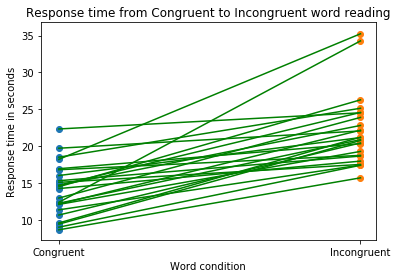

In [8]:
# input data:
Congruent = stroop_data['Congruent']
Incongruent = stroop_data['Incongruent']

# plot the points
plt.scatter(np.zeros(len(Congruent)), Congruent)
plt.scatter(np.ones(len(Incongruent)), Incongruent)
Congruent
#parallel_coordinates(stroop_data, 'Time_difference',cols=[Congruent,Incongruent] )

# Connect the points
for i in range(len(Congruent)):
    plt.plot( [0,1], [Congruent[i], Incongruent[i]], c='g')

plt.xticks([0,1], ['Congruent', 'Incongruent'])
plt.title('Response time from Congruent to Incongruent word reading')
plt.ylabel('Response time in seconds')
plt.xlabel('Word condition')

plt.show()

In [7]:
#Summary statistics provides the measure of central tendency and variability.
summary_stat_stroopData=stroop_data.describe() 
summary_stat_stroopData

,Congruent,Incongruent,Time_difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


***Measure of central tendency - Mean :***

In [10]:
summary_stat_stroopData.loc['mean','Congruent':'Incongruent']

Congruent      14.051125
Incongruent    22.015917
Name: mean, dtype: float64

***Measure of variability -Standard Deviation :***


In [11]:
summary_stat_stroopData.loc['std','Congruent':'Incongruent']

Congruent      3.559358
Incongruent    4.797057
Name: std, dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Distribution of the sample data is visualized using box plot and distplot.**

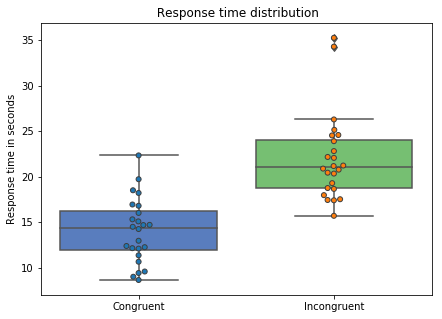

In [23]:
# Box plot visualization

plt.figure(figsize=(7,5))
sns.boxplot(data=stroop_data[['Congruent','Incongruent']],palette='muted',fliersize =6,linewidth=1.5);
sns.swarmplot(data=stroop_data[['Congruent','Incongruent']],linewidth=1.0);
plt.title(' Response time distribution');
plt.ylabel('Response time in seconds');

The box plot has been overlayed with swarm plot.Since the number of samples are small(n<30),we can see use swarm plot to display the underlying distribution.The summary statistics showing the measures of central tendency and spread of data is visualized here.

The response time is greater under 'Incongruent' word condition with median value at 21.02 seconds while median for 'Congruent' word condition is at 14.36 seconds.
We see outliers under 'Incongruent' word condition at 35.35 seconds.Outliers influence mean value and hence standard deviation.

Box plot distribution for 'Congruent' is left skewed with median(14.36) > (mean 14.05) while  'Incongruent' is slightly right skewed with mean(22.02)> median(21.02)

Standard deviation is higher for 'Incongruent' condition at 4.79 indicating greater spread in data while 'Congruent' condition is at 3.56.

Consider the below distribution visualized using distplot  which plots a histogram and overlays a kernel density estimate to visualize the shape of a distribution and rug plot displays the datapoints.Both mean and median for 'Congruent' condition, 'Incongruent' condition and their 'Time_difference' are close enough to be in the tallest bin(peak).The curve is nearly symmetrical(without considering the outliers) and is approximately normally distributed.

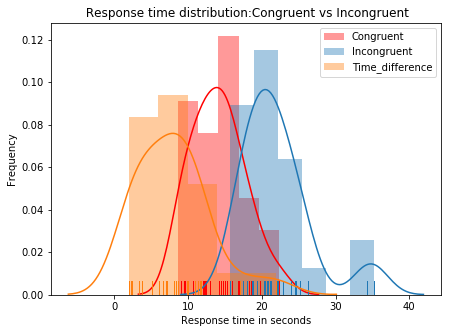

In [25]:
#Displot visualization 
plt.figure(figsize=(7,5))
sns.distplot(stroop_data['Congruent'], rug = True, label = "Congruent",color='r');
sns.distplot(stroop_data['Incongruent'], rug = True, label = "Incongruent");
sns.distplot(stroop_data['Time_difference'], rug = True, label = "Time_difference");
plt.title(' Response time distribution:Congruent vs Incongruent');
plt.xlabel('Response time in seconds');
plt.ylabel('Frequency');
plt.legend();

 ## Statistical test and results

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**As stated under question 2,we have 2 related groups of data under two different tasks being performed by the same individual.Considering that the sample size is n < 30 ,suitable statistical test is a paired T-test (also called a correlated pairs t-test indicating the sets of sample data are dependent).**


** Steps for the paired sample t-test :**

In [14]:
#import stats module`
from scipy import stats

#1.Compute t-statistic  and p-value using function ttest_rel ca
stats.ttest_rel(stroop_data['Incongruent'], stroop_data['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The output generated consists of t-statistic value and the pvalue, which is a 2-tailed p-value as ttest_rel is 2-tailed ttest for null hypothesis. Let us consider a confidence level of 95% therefore our Type-I error rate, $\alpha $ or the threshold significance level is 0.05. Inorder to infer that the  p-value generated from the paired t-test is statistically significant, the value is compared to $\alpha $.

Briefly, let us get an intuition of the individual parameters for calculating t-statistic.Values are from from summary statistics.

$\overline{d}$ = mean difference -->7.964792 

$S_{d}$ = standard deviation difference -->4.864827

$\sqrt{n}$ = sqrt(sample size) -->24

$$t-statistic=\frac{\overline{d}}{\frac{S_{d}}{\sqrt{n}}}$$

In [1]:
#Since ours is a one-tailed paired ttest, compute p-value for one-tailed ttest .
pvalue=4.1030005857111781e-08
one_tailed_pvalue=pvalue/2
one_tailed_pvalue

2.051500292855589e-08

In [15]:
#Compute critical value uisng confidence level(cl) and degrees of freedom(df). Can cross chekc the values by looking up 
#the t-distribution table.
cl=0.9
df=23 #(sample size(n)-1)
t_critical_value=stats.t.interval(0.9,23)
t_critical_value

(-1.7138715277470478, 1.7138715277470473)

In [22]:
#Alternatively
# t-critical values at alpha = 0.05 and df = 23 for one-tailed t-test, q = Quantile to check
df=23
t_critical_values = (stats.t.ppf(q=0.05,df=df), stats.t.ppf(q=0.95,df=df))  
t_critical_values

(-1.7138715277470478, 1.7138715277470473)

##  Conclusions

**1. Our computed one-tailed p-value is 2.051500292855589e-08 which is way less than the alpha of 0.05.**

**2. The t-statistic value is 8.02071 which is outside of the critical value 1.714 in the t-distribution.**

**3. Note  that we have a very large test statistic and a very small p-value.**

**4. There is just 2.051500292855589e-08 odds of getting equal response time inorder to incline towards null hypothesis.**

** With t-statistic > t-critical value and p-value < alpha, the result is statistically significant. The above observations makes it clear that we reject the null hypothesis in favour of alternative hypothesis.This is in sync with the time difference plot showing greater response time for reading 'Incongruent' word condition,indicating mind needs to pause and process the task then proceed with  reading.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Stroop test is used to measure selective attention capacity and processing speed ability of an individual and how cognitve  control improves with age. The color reading test shows that out brain is automatized to semantic reading.The congruent word reading task has quicker response as the mind read the word and thought of the color. The subsequent task introduced interference, where the mind had to pause to process the info 'read the color first and not the word'.This psychological test is a popular test and is used in neuropsychological assessments. The test has spawned into variations like  Numerical Stroop effect,Emotional stroop effect,etc  and is also used in Multilingualism.**


***References***

 1. [Why use a paired t test](http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/)  
 
 2. [ Paired Samples T Test](http://www.statisticshowto.com/probability-and-statistics/t-test/)
 
 3. [Parallel axis dot plot](https://stackoverflow.com/questions/32538812/parallel-axis-dot-plot-with-vertical-histograms-for-paired-samples)
 
 4. [Distributions](https://seaborn.pydata.org/tutorial/distributions.html)
 
 5. [Basic Stats](http://www.statisticshowto.com/test-statistic/)
 
 6. [Stackoverflow](https://stackoverflow.com/questions/17290661/interpretting-scipy-functions-meaning-and-usage-t-interval?rq=1)